<a href="https://colab.research.google.com/github/falakniaz/LED-Detection-YOLOv8/blob/main/led_detectionYOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO
import os
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

**Create dataset.yaml**

In [ ]:
yaml_content = """
train: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/train/images
val: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images

nc: 1
names: ['LED']
"""

yaml_path = "/content/drive/MyDrive/Panoptic Segmentation/dataset.yaml"
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print("dataset.yaml created!")


dataset.yaml created!


**Train the YOLOv8 model**

In [ ]:


model = YOLO('yolov8n.pt')

model.train(
    data=yaml_path,
    epochs=100,
    imgsz=640,
    batch=16,
    project='runs/detect',
    name='train',
    exist_ok=True
)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Panoptic Segmentation/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

train: Scanning /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/train/labels.cache... 87 images, 0 backgrounds, 82 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]

train: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/train/images/00489_png.rf.ec13b680eb6f9b7900c6ae5e39a64a8e.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/train/images/00542_png.rf.fc07097a51d9602b2e0d4b7567fd86b7.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/train/images/00547_png.rf.6d9cc9b967556102f40924ec196c43d9.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/train/images/00571_png.rf.0b9b5be602cddfde7bc6e9eab5b9f08a.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
trai

val: Fast image access ✅ (ping: 0.9±0.8 ms, read: 27.2±11.3 MB/s, size: 61.3 KB)


val: Scanning /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/labels.cache... 22 images, 0 backgrounds, 21 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_01-57-45-915430_png.rf.33e8e5b91a464b7ad519f0b1331203f8.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_01-57-58-714665_png.rf.1b2189f64ec9e09f2488a5b9f703053c.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_01-58-11-355381_png.rf.fffd2c0a7629278c2d6f33637c874849.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_01-58-15-243948_png.rf.01f6f0e59efa5109e07669f8b8dd868d.jpg: ignoring 

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.729G      1.446      3.815      1.122         44        640: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]

                   all          1          3       0.01          1     0.0124    0.00365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.729G      1.029      3.318      1.008         23        640: 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.88it/s]

                   all          1          3       0.01          1     0.0102    0.00294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.729G     0.8762      3.173     0.9736         19        640: 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.90it/s]

                   all          1          3       0.01          1     0.0116    0.00338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.729G      1.053      3.456     0.9782         34        640: 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.53it/s]

                   all          1          3       0.01          1     0.0133    0.00422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.729G       1.07      3.429      1.031         24        640: 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.17it/s]

                   all          1          3       0.01          1     0.0132    0.00778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.729G       1.06      3.717      1.053         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.52it/s]

                   all          1          3       0.01          1     0.0144    0.00869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.729G      0.905      3.368     0.9659         31        640: 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.33it/s]

                   all          1          3       0.01          1     0.0178     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.729G      1.008      3.284     0.9386         25        640: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.41it/s]

                   all          1          3       0.01          1     0.0177     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.729G      0.773      3.157     0.8914         27        640: 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.17it/s]

                   all          1          3       0.01          1     0.0233     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      0.73G     0.8303      2.983     0.8642         24        640: 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.47it/s]

                   all          1          3       0.01          1     0.0253     0.0202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      0.73G     0.6806      2.613     0.8599         22        640: 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.49it/s]

                   all          1          3       0.01          1      0.184      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      0.73G     0.6938       2.25     0.8473         33        640: 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.34it/s]

                   all          1          3       0.01          1      0.352      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      0.73G     0.7275      1.994     0.8955         27        640: 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.71it/s]

                   all          1          3       0.01          1      0.353      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      0.73G     0.7397      1.443     0.8196         25        640: 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.99it/s]


                   all          1          3       0.01          1      0.354      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      0.73G     0.8486      1.452     0.8328         33        640: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.13it/s]

                   all          1          3       0.01          1      0.354      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      0.73G     0.6906      1.136     0.8069         23        640: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.70it/s]

                   all          1          3     0.0283          1      0.418      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      0.73G     0.6575      1.012     0.8113         36        640: 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.39it/s]

                   all          1          3     0.0269          1      0.674      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      0.73G     0.6758      1.073     0.8046         29        640: 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.03it/s]

                   all          1          3     0.0269          1      0.674      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.762G     0.6499      1.056     0.8468         25        640: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.21it/s]

                   all          1          3       0.01          1      0.789      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.764G     0.7394      1.014     0.8331         35        640: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          1          3       0.01          1      0.789      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.775G     0.8056      1.057     0.8108         39        640: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.48it/s]

                   all          1          3       0.01          1      0.789      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.775G      0.652     0.9824     0.8232         36        640: 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all          1          3       0.01          1      0.789      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.775G     0.6715      1.015     0.8107         29        640: 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.05it/s]

                   all          1          3       0.01          1      0.675      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.781G     0.5983      1.104     0.8641         19        640: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.84it/s]

                   all          1          3       0.01          1      0.675      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.793G     0.5909      1.121     0.8385         27        640: 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.61it/s]

                   all          1          3       0.01          1      0.676      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.793G     0.5945     0.9084     0.8427         23        640: 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.43it/s]

                   all          1          3       0.01          1      0.676      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.793G     0.7605     0.9182     0.8513         28        640: 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.39it/s]

                   all          1          3       0.01          1      0.135      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.793G     0.5424     0.8787     0.8372         29        640: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.37it/s]

                   all          1          3       0.01          1      0.135      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.809G     0.5977     0.9683     0.8416         22        640: 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.20it/s]

                   all          1          3       0.01          1       0.19      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.809G     0.4888     0.9496     0.8442         29        640: 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.42it/s]

                   all          1          3       0.01          1       0.19      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.809G     0.4279     0.9861     0.8052         27        640: 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.08it/s]

                   all          1          3    0.00667      0.667      0.177      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.809G     0.7457     0.9126     0.8554         29        640: 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.28it/s]

                   all          1          3    0.00667      0.667      0.177      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.826G     0.6289     0.9739     0.8758         30        640: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.49it/s]

                   all          1          3    0.00667      0.667     0.0196     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.832G     0.5283      1.137     0.8812         19        640: 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.73it/s]

                   all          1          3    0.00667      0.667     0.0196     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.844G     0.6148     0.8506     0.8438         33        640: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.23it/s]

                   all          1          3    0.00667      0.667     0.0184     0.0117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.844G     0.4171     0.8485     0.7754         17        640: 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.23it/s]

                   all          1          3    0.00667      0.667     0.0184     0.0117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.846G     0.5085     0.9338      0.868         16        640: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.31it/s]

                   all          1          3    0.00667      0.667     0.0138    0.00806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.846G     0.5006     0.8483     0.8744         21        640: 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.57it/s]

                   all          1          3    0.00667      0.667     0.0138    0.00806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.846G     0.6275     0.8077     0.8435         22        640: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.07it/s]

                   all          1          3    0.00667      0.667     0.0102    0.00542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.846G     0.5505     0.9989     0.8526         17        640: 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]

                   all          1          3    0.00667      0.667     0.0102    0.00542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.846G      0.528      0.821     0.7981         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.45it/s]

                   all          1          3    0.00667      0.667    0.00937    0.00465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.846G     0.4816      0.769      0.811         19        640: 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.53it/s]

                   all          1          3    0.00667      0.667    0.00937    0.00465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.846G     0.5019     0.9178     0.7881         15        640: 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.41it/s]

                   all          1          3    0.00667      0.667     0.0112    0.00624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.846G     0.4987     0.7156     0.7965         41        640: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all          1          3    0.00667      0.667     0.0112    0.00624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.846G     0.4677     0.8824     0.8542         23        640: 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.88it/s]

                   all          1          3       0.01          1     0.0398     0.0242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.846G     0.5415     0.7452     0.8198         33        640: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]

                   all          1          3       0.01          1     0.0398     0.0242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.846G     0.4633     0.7443     0.8352         29        640: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.75it/s]

                   all          1          3       0.01          1      0.358      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.846G     0.5679     0.9188     0.8005         21        640: 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]

                   all          1          3       0.01          1      0.358      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.846G     0.5805     0.8243     0.8297         25        640: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.26it/s]

                   all          1          3       0.01          1      0.429       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.846G     0.5432     0.7197      0.882         24        640: 100%|██████████| 1/1 [00:00<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.10it/s]

                   all          1          3       0.01          1      0.429       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.846G     0.5841     0.7478     0.8412         36        640: 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.41it/s]

                   all          1          3       0.01          1      0.676      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.846G     0.5513     0.7082     0.8627         28        640: 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.23it/s]

                   all          1          3       0.01          1      0.676      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.846G     0.5145     0.7116     0.8612         27        640: 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.81it/s]

                   all          1          3       0.01          1      0.676      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.846G     0.5006     0.8676     0.8252         17        640: 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.57it/s]

                   all          1          3       0.01          1      0.682      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.846G      0.467     0.6159     0.7808         38        640: 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.66it/s]

                   all          1          3       0.01          1      0.682      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.846G     0.4861     0.7537     0.7835         24        640: 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.56it/s]

                   all          1          3       0.01          1      0.682      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.846G     0.4629     0.6288     0.7773         21        640: 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.49it/s]

                   all          1          3       0.01          1      0.806      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.846G      0.509     0.7217     0.8022         26        640: 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.57it/s]

                   all          1          3       0.01          1      0.806      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.846G     0.4608      0.632     0.7996         34        640: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.37it/s]

                   all          1          3       0.01          1      0.806      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.846G     0.5623     0.7548     0.8539         23        640: 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.16it/s]

                   all          1          3       0.01          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.846G     0.5054     0.6923     0.8257         39        640: 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          1          3       0.01          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.846G     0.4717     0.7038     0.8591         19        640: 100%|██████████| 1/1 [00:00<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.21it/s]

                   all          1          3       0.01          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.846G      0.561     0.7909     0.8435         22        640: 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.35it/s]

                   all          1          3       0.01          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.846G     0.4112     0.7168     0.8532         25        640: 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.14it/s]

                   all          1          3       0.01          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.846G     0.5031     0.8365      0.825         19        640: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.19it/s]

                   all          1          3       0.01          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.846G     0.4839       0.62     0.8383         30        640: 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.38it/s]

                   all          1          3       0.01          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.846G     0.3713     0.6956     0.8144         21        640: 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.26it/s]

                   all          1          3       0.01          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.846G     0.3758     0.6312     0.8301         24        640: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.16it/s]

                   all          1          3       0.01          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.846G     0.4708     0.6249     0.8189         25        640: 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.69it/s]


                   all          1          3       0.01          1      0.995      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.846G     0.4244     0.6896     0.7971         21        640: 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.38it/s]

                   all          1          3       0.01          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.846G      0.423     0.5906     0.8456         31        640: 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.46it/s]

                   all          1          3       0.01          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.846G     0.5253     0.6671     0.7874         28        640: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.00it/s]

                   all          1          3     0.0283          1      0.995      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.846G     0.3819     0.5838     0.8096         31        640: 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.81it/s]

                   all          1          3     0.0283          1      0.995      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.846G     0.4217     0.5409     0.7852         27        640: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.63it/s]

                   all          1          3     0.0283          1      0.995      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.846G      0.488     0.6379     0.8039         32        640: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.31it/s]

                   all          1          3      0.755          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.846G     0.5282     0.8801      0.842         20        640: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all          1          3      0.755          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.846G     0.4747      0.614     0.8074         41        640: 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all          1          3      0.755          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.846G     0.4279     0.6438      0.795         22        640: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.63it/s]

                   all          1          3       0.93          1      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.846G     0.4206      0.611     0.8163         31        640: 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.92it/s]

                   all          1          3       0.93          1      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.846G     0.3913     0.6196     0.7998         22        640: 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.56it/s]

                   all          1          3       0.93          1      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.846G     0.4782     0.7206        0.8         21        640: 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.99it/s]

                   all          1          3          1      0.647      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.846G     0.4101     0.5809     0.7858         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]

                   all          1          3          1      0.647      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.846G      0.483     0.6373     0.8229         28        640: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.30it/s]

                   all          1          3          1      0.647      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.846G     0.4127     0.5426     0.7927         32        640: 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.28it/s]

                   all          1          3          1      0.641      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.846G      0.394     0.5283     0.7843         33        640: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.05it/s]

                   all          1          3          1      0.641      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.846G     0.4044     0.6401     0.8005         22        640: 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.84it/s]

                   all          1          3          1      0.641      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.846G     0.4118     0.6172     0.8555         32        640: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.04it/s]

                   all          1          3          1      0.641      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.846G     0.4099     0.6295     0.8403         26        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.73it/s]

                   all          1          3       0.96          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.846G     0.3674     0.6807     0.7944         17        640: 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.05it/s]

                   all          1          3       0.96          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.846G     0.4097     0.6923      0.822         20        640: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.48it/s]

                   all          1          3       0.96          1      0.995      0.719


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.846G     0.4864      0.784     0.8252         15        640: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]

                   all          1          3       0.96          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.846G     0.3405     0.6359     0.8075         15        640: 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.93it/s]

                   all          1          3      0.894          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.846G     0.3809     0.7481     0.8253         15        640: 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.40it/s]

                   all          1          3      0.894          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.846G     0.3343     0.6256     0.8115         15        640: 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]

                   all          1          3      0.894          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.846G     0.3475     0.5967      0.701         15        640: 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.98it/s]

                   all          1          3      0.894          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.846G     0.3899     0.7015     0.7672         15        640: 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.94it/s]

                   all          1          3      0.909          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.846G     0.3704     0.6702     0.7703         15        640: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.49it/s]

                   all          1          3      0.909          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.846G     0.3658     0.6881     0.8022         15        640: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.02it/s]

                   all          1          3      0.909          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.846G     0.3839     0.7427     0.7876         15        640: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.45it/s]

                   all          1          3      0.909          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.846G     0.2999     0.5972     0.7513         15        640: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.22it/s]

                   all          1          3       0.94          1      0.995      0.719



100 epochs completed in 0.014 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.77it/s]


                   all          1          3       0.01          1      0.995      0.807
Speed: 0.4ms preprocess, 37.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae1752bdb10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

**Load trained model and run inference on validation images**

🖼️ Found 22 images for prediction.


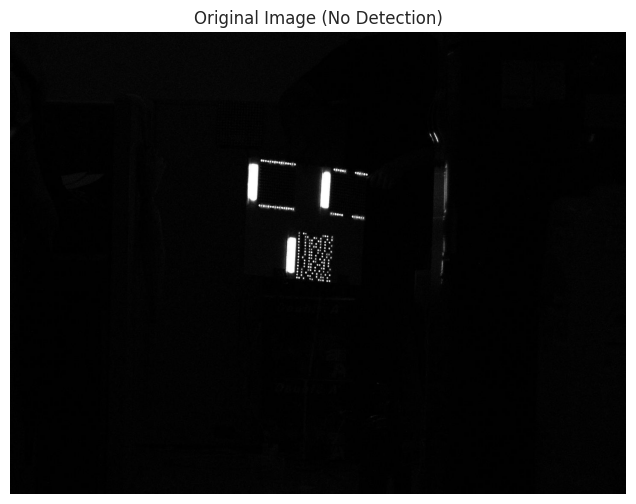


image 1/1 /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_02-07-53-362902_png.rf.a7b99e19e4643b9ab8d4cc826b9d5c38.jpg: 480x640 3 LEDs, 7.9ms
Speed: 2.6ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


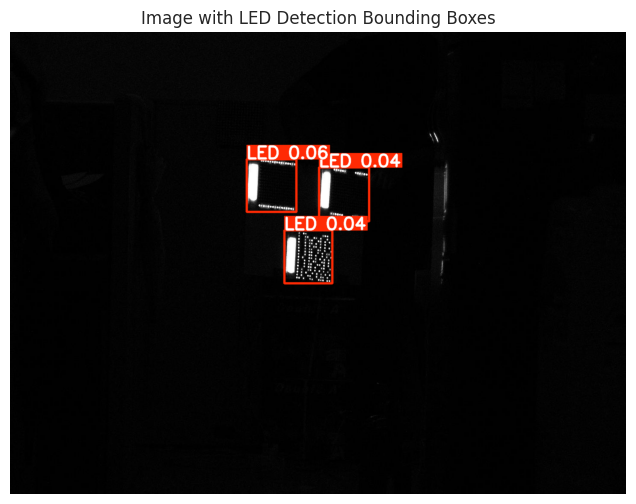


image 1/1 /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_02-09-15-867318_png.rf.f8ffc875934da2250c6cb77e3acb3fc4.jpg: 480x640 3 LEDs, 8.7ms
Speed: 2.7ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_01-58-33-530858_png.rf.41806242309cd5d28d20d504cdb8bf67.jpg: 480x640 1 LED, 7.0ms
Speed: 2.6ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_02-08-30-571130_png.rf.fe4cf75cfe8ffd2bf7666de67832fb3f.jpg: 480x640 1 LED, 7.2ms
Speed: 2.6ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_02-03-48-

In [ ]:


model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

val_images_dir = "/content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images"
image_files = [os.path.join(val_images_dir, f) for f in os.listdir(val_images_dir)
               if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Found {len(image_files)} images for prediction.")

latencies = []
all_results = []

for image_path in image_files:
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show original image before detection
    if len(all_results) == 0:
        plt.figure(figsize=(8,6))
        plt.title("Original Image (No Detection)")
        plt.axis('off')
        plt.imshow(img_rgb)
        plt.show()

    start = time.time()
    results = model.predict(source=image_path, imgsz=640, conf=0.03)
    end = time.time()
    latencies.append(end - start)
    all_results.append(results)
    # Show predicted bounding boxes for first image
    if len(all_results) == 1:
        results[0].plot()  # draws boxes on image in-place
        plt.figure(figsize=(8,6))
        plt.title("Image with LED Detection Bounding Boxes")
        plt.axis('off')
        plt.imshow(results[0].plot())
        plt.show()

In [ ]:
average_latency = sum(latencies) / len(latencies) if latencies else 0
print(f"Average inference time per image: {average_latency:.4f} seconds")

Average inference time per image: 0.0306 seconds


**Evaluate model on validation set**

In [ ]:
metrics = model.val(data=yaml_path, split='val')

print(f"Evaluation Metrics:")
print(f"   - mAP50:     {metrics.box.map50:.4f}")
print(f"   - mAP50-95:  {metrics.box.map:.4f}")
print(f"   - Precision: {metrics.box.mp:.4f}")
print(f"   - Recall:    {metrics.box.mr:.4f}")

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 27.9±7.4 MB/s, size: 50.2 KB)


val: Scanning /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/labels.cache... 22 images, 0 backgrounds, 21 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_01-57-45-915430_png.rf.33e8e5b91a464b7ad519f0b1331203f8.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_01-57-58-714665_png.rf.1b2189f64ec9e09f2488a5b9f703053c.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_01-58-11-355381_png.rf.fffd2c0a7629278c2d6f33637c874849.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Panoptic Segmentation/Dataset07032025.v1i.yolov12/valid/images/image_2025-03-07_01-58-15-243948_png.rf.01f6f0e59efa5109e07669f8b8dd868d.jpg: ignoring 


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.81it/s]


                   all          1          3       0.01          1      0.995      0.807
Speed: 1.4ms preprocess, 36.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val16
Evaluation Metrics:
   - mAP50:     0.9950
   - mAP50-95:  0.8073
   - Precision: 0.0100
   - Recall:    1.0000


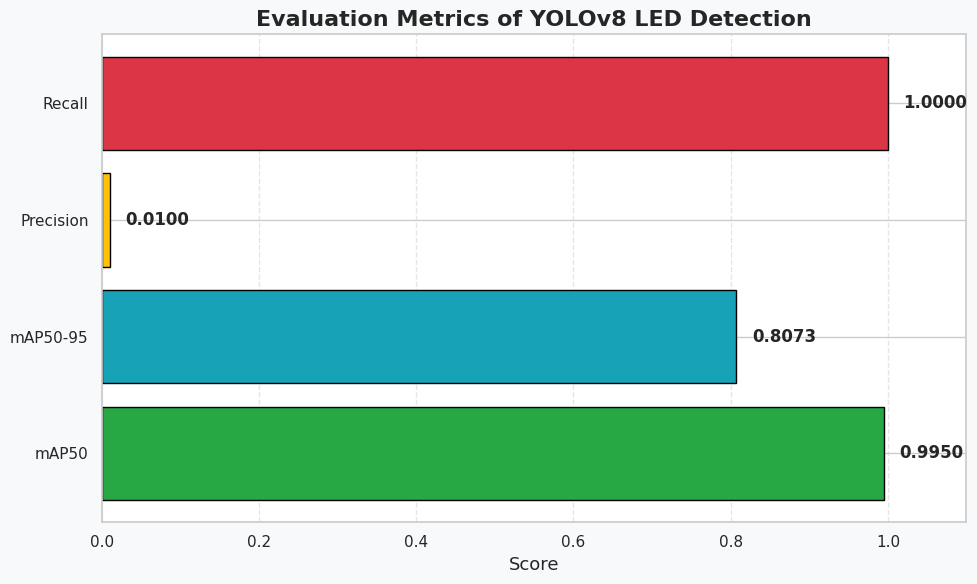

In [ ]:


# Evaluation metrics
metrics_data = {
    'mAP50': 0.9950,
    'mAP50-95': 0.8073,
    'Precision': 0.0100,
    'Recall': 1.0000
}

# Styling
colors = ['#28a745', '#17a2b8', '#ffc107', '#dc3545']
labels = list(metrics_data.keys())
values = list(metrics_data.values())

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#f8f9fa')

# Bar chart
bars = ax.barh(labels, values, color=colors, edgecolor='black')

# Add values at the end of bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.02, bar.get_y() + bar.get_height() / 2,
            f'{width:.4f}', va='center', fontsize=12, fontweight='bold')

# Aesthetic settings
ax.set_xlim(0, 1.1)
ax.set_title('Evaluation Metrics of YOLOv8 LED Detection', fontsize=16, fontweight='bold')
ax.set_xlabel('Score', fontsize=13)
ax.set_facecolor('#ffffff')
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Training Curves (Loss, mAP, Precision, Recall):


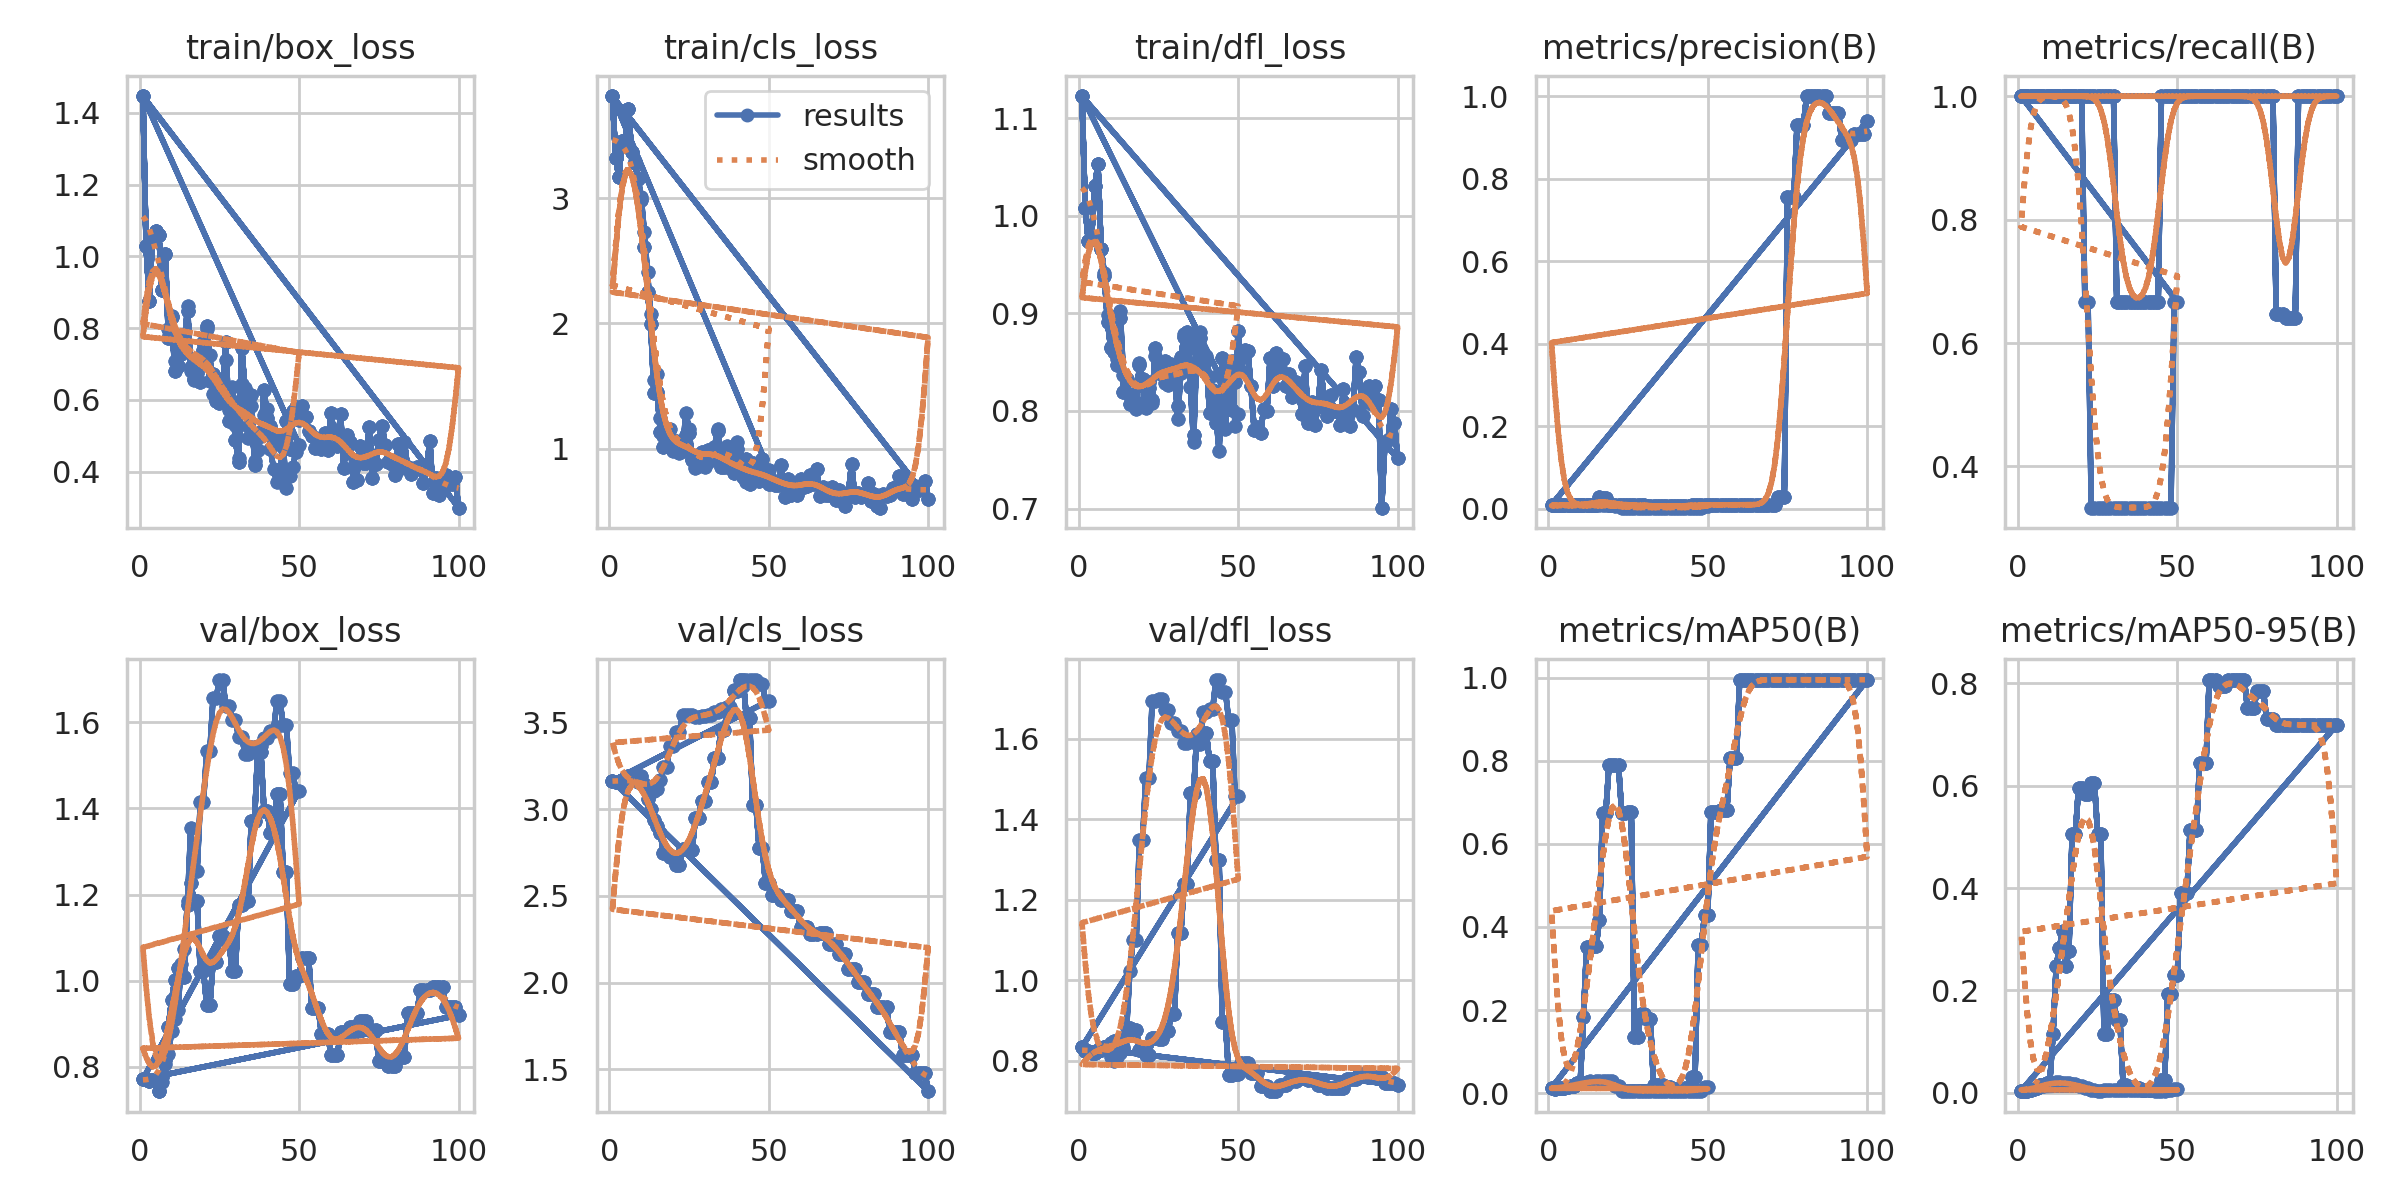

In [ ]:


# Path to results.png
training_plot_path = "/content/runs/detect/train/results.png"

# Display the image
print("Training Curves (Loss, mAP, Precision, Recall):")
display(Image(filename=training_plot_path))


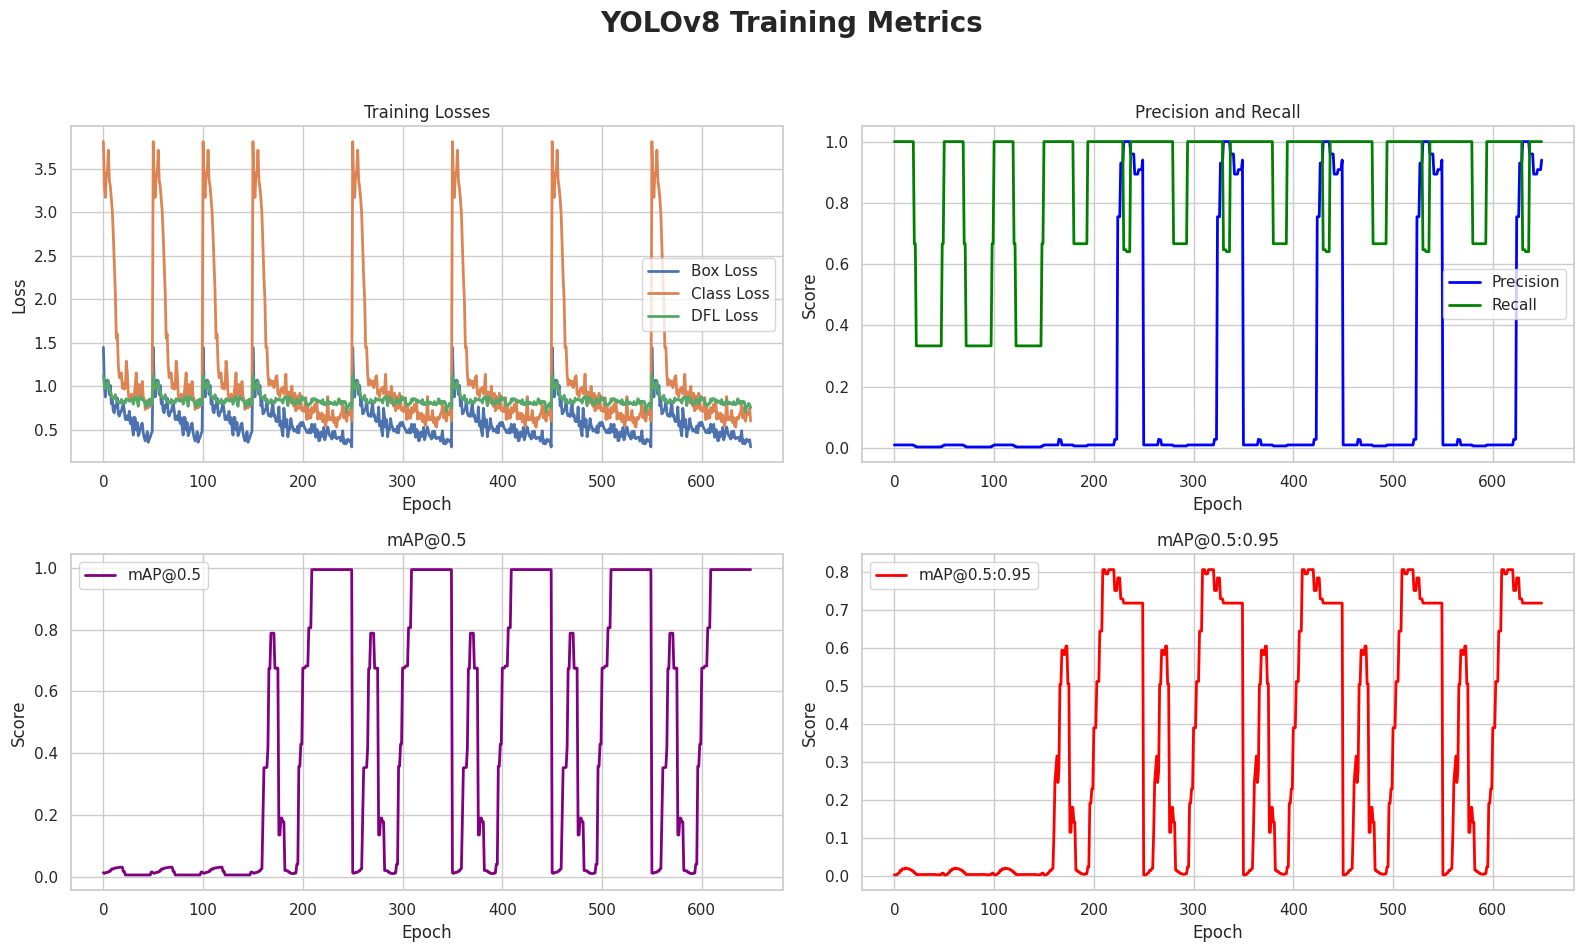

In [ ]:
# Load CSV
df = pd.read_csv("/content/runs/detect/train/results.csv")
df.columns = df.columns.str.strip()

# Plot styling
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
plt.suptitle("YOLOv8 Training Metrics", fontsize=20, weight='bold')

# Subplot 1: Box, Cls, DFL loss
plt.subplot(2, 2, 1)
plt.plot(df["train/box_loss"], label="Box Loss", linewidth=2)
plt.plot(df["train/cls_loss"], label="Class Loss", linewidth=2)
plt.plot(df["train/dfl_loss"], label="DFL Loss", linewidth=2)
plt.title("Training Losses")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.grid(True)

# Subplot 2: Precision & Recall
plt.subplot(2, 2, 2)
plt.plot(df["metrics/precision(B)"], label="Precision", color='blue', linewidth=2)
plt.plot(df["metrics/recall(B)"], label="Recall", color='green', linewidth=2)
plt.title("Precision and Recall")
plt.xlabel("Epoch"); plt.ylabel("Score")
plt.legend(); plt.grid(True)

# Subplot 3: mAP@0.5
plt.subplot(2, 2, 3)
plt.plot(df["metrics/mAP50(B)"], label="mAP@0.5", color='purple', linewidth=2)
plt.title("mAP@0.5")
plt.xlabel("Epoch"); plt.ylabel("Score")
plt.legend(); plt.grid(True)

# Subplot 4: mAP@0.5:0.95
plt.subplot(2, 2, 4)
plt.plot(df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95", color='red', linewidth=2)
plt.title("mAP@0.5:0.95")
plt.xlabel("Epoch"); plt.ylabel("Score")
plt.legend(); plt.grid(True)

# Show
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
